In [ ]:
!pip install opendatasets --upgrade --quiet

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import opendatasets as od
import warnings
warnings.filterwarnings('ignore')
plt.style.use('ggplot')
%matplotlib inline

In [ ]:
url = 'https://www.kaggle.com/competitions/cat-in-the-dat-ii/data'
od.download(url)

100%|██████████| 41.3M/41.3M [00:00<00:00, 109MB/s]



Extracting archive ./cat-in-the-dat-ii/cat-in-the-dat-ii.zip to ./cat-in-the-dat-ii


In [ ]:
df_train = pd.read_csv('cat-in-the-dat-ii/train.csv')
df_test = pd.read_csv('cat-in-the-dat-ii/test.csv')

In [ ]:
df_train.head()

,id,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,...,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month,target
0,0,0.0,0.0,0.0,F,N,Red,Trapezoid,Hamster,Russia,...,02e7c8990,3.0,Contributor,Hot,c,U,Pw,6.0,3.0,0
1,1,1.0,1.0,0.0,F,Y,Red,Star,Axolotl,NaN,...,f37df64af,3.0,Grandmaster,Warm,e,X,pE,7.0,7.0,0
2,2,0.0,1.0,0.0,F,N,Red,NaN,Hamster,Canada,...,NaN,3.0,NaN,Freezing,n,P,eN,5.0,9.0,0
3,3,NaN,0.0,0.0,F,N,Red,Circle,Hamster,Finland,...,f9d456e57,1.0,Novice,Lava Hot,a,C,NaN,3.0,3.0,0
4,4,0.0,NaN,0.0,T,N,Red,Triangle,Hamster,Costa Rica,...,c5361037c,3.0,Grandmaster,Cold,h,C,OZ,5.0,12.0,0


In [ ]:
df_test.head()

,id,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,...,nom_8,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month
0,600000,0.0,0.0,0.0,F,Y,Blue,Polygon,Axolotl,Finland,...,ca9ad1d4b,fced9e114,3.0,Novice,Boiling Hot,f,U,oU,3.0,9.0
1,600001,0.0,0.0,0.0,F,Y,Red,Circle,Lion,Russia,...,060a21580,7ca8775da,1.0,Novice,Cold,n,N,NaN,2.0,8.0
2,600002,0.0,0.0,0.0,F,Y,Blue,Circle,Axolotl,Russia,...,165e81a00,5940334c9,1.0,Expert,Warm,i,N,DN,2.0,6.0
3,600003,1.0,0.0,0.0,F,N,Red,Polygon,Axolotl,Costa Rica,...,77d41330d,6fbdeefc8,1.0,Expert,Hot,m,B,AG,1.0,6.0
4,600004,0.0,0.0,1.0,F,Y,Red,Circle,NaN,Finland,...,2218d9dfe,2a27c8fde,1.0,Contributor,Lava Hot,o,J,DT,3.0,3.0


In [ ]:
df_train.shape

(600000, 25)

In [ ]:
df_train.isna().mean() * 100

id        0.000000
bin_0     2.982333
bin_1     3.000500
bin_2     2.988333
bin_3     3.002333
bin_4     3.007833
nom_0     3.042000
nom_1     3.026000
nom_2     3.005833
nom_3     3.020167
nom_4     3.005833
nom_5     2.963000
nom_6     3.021833
nom_7     3.000500
nom_8     2.959167
nom_9     3.012167
ord_0     3.048000
ord_1     3.006833
ord_2     3.012500
ord_3     2.986000
ord_4     2.988333
ord_5     2.952167
day       2.992000
month     2.998000
target    0.000000
dtype: float64

In [ ]:
df_test.isna().mean() * 100

id       0.00000
bin_0    2.97525
bin_1    3.00950
bin_2    2.99300
bin_3    2.98775
bin_4    2.98775
nom_0    3.01550
nom_1    2.98675
nom_2    3.04475
nom_3    3.04400
nom_4    2.99825
nom_5    2.97800
nom_6    3.00300
nom_7    3.00075
nom_8    2.98900
nom_9    3.01500
ord_0    2.97325
ord_1    3.04175
ord_2    3.02625
ord_3    3.01325
ord_4    2.98325
ord_5    3.01175
day      3.00625
month    2.99600
dtype: float64

In [ ]:
df_train.target.value_counts(normalize=True)

0    0.812795
1    0.187205
Name: target, dtype: float64

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600000 entries, 0 to 599999
Data columns (total 25 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      600000 non-null  int64  
 1   bin_0   582106 non-null  float64
 2   bin_1   581997 non-null  float64
 3   bin_2   582070 non-null  float64
 4   bin_3   581986 non-null  object 
 5   bin_4   581953 non-null  object 
 6   nom_0   581748 non-null  object 
 7   nom_1   581844 non-null  object 
 8   nom_2   581965 non-null  object 
 9   nom_3   581879 non-null  object 
 10  nom_4   581965 non-null  object 
 11  nom_5   582222 non-null  object 
 12  nom_6   581869 non-null  object 
 13  nom_7   581997 non-null  object 
 14  nom_8   582245 non-null  object 
 15  nom_9   581927 non-null  object 
 16  ord_0   581712 non-null  float64
 17  ord_1   581959 non-null  object 
 18  ord_2   581925 non-null  object 
 19  ord_3   582084 non-null  object 
 20  ord_4   582070 non-null  object 
 21  ord_5   58

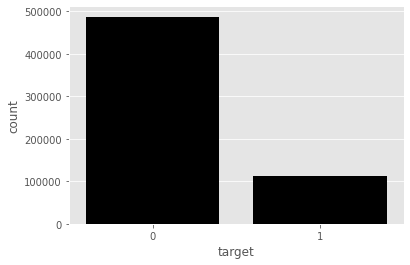

In [ ]:
sns.countplot(data=df_train, x='target', color='k')

In [ ]:
cats = [cat for cat in df_train.columns if 'nom' in cat or 'ord' in cat]

['nom_0', 'nom_1', 'nom_2', 'nom_3', 'nom_4', 'nom_5', 'nom_6', 'nom_7', 'nom_8', 'nom_9', 'ord_0', 'ord_1', 'ord_2', 'ord_3', 'ord_4', 'ord_5']


In [ ]:
for cat in cats:
  print(f'{cat}: {df_train[cat].nunique()}\n {df_train[cat].unique()}')
  print()

nom_0: 3
 ['Red' 'Blue' 'Green' nan]

nom_1: 6
 ['Trapezoid' 'Star' nan 'Circle' 'Triangle' 'Polygon' 'Square']

nom_2: 6
 ['Hamster' 'Axolotl' 'Lion' 'Dog' 'Cat' 'Snake' nan]

nom_3: 6
 ['Russia' nan 'Canada' 'Finland' 'Costa Rica' 'China' 'India']

nom_4: 4
 ['Bassoon' 'Theremin' nan 'Oboe' 'Piano']

nom_5: 1220
 ['de4c57ee2' '2bb3c3e5c' 'b574c9841' ... 'b3ad70fcb' 'd6bb2181a'
 '30019ce8a']

nom_6: 1519
 ['a64bc7ddf' '3a3a936e8' '708248125' ... '96c5df3d0' 'a93b49b8c'
 'd80c01ec8']

nom_7: 222
 ['598080a91' '1dddb8473' '5ddc9a726' '3a33ef960' 'bc9cc2a94' '8c30b9b0b'
 '1cba571fa' '81d67e1bb' '429114096' '56d35c774' '93360bbc9' '088aace2d'
 '12370b989' 'ba9faf5b1' 'fdebf0648' '90a2cba07' '5de0b3fa7' 'e5b00a0e0'
 '1d2ee04de' nan '69403e18c' 'cf84cbe77' 'fba315672' '6e29d3f38'
 'c3ad85934' '6b1d5295a' 'a306b1f4e' '432ee0053' '9a9e7bf71' 'b2d0012ea'
 '9d52e9089' 'bb63fcef7' 'dd4d69481' 'b0ab8b134' '2c649f60e' '42f607baa'
 '7e1c4cff1' '482233c7f' '7f31f4d2b' '11409e362' '4ae48e857' '3f63ec

In [ ]:
df_train.ord_2.value_counts(dropna=False)

Freezing       142726
Warm           124239
Cold            97822
Boiling Hot     84790
Hot             67508
Lava Hot        64840
NaN             18075
Name: ord_2, dtype: int64

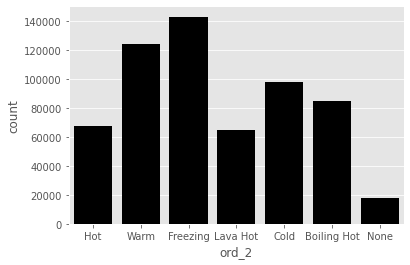

In [ ]:
sns.countplot(x=df_train.ord_2.fillna('None'), color='k')

In [ ]:
df_train.head(2)

,id,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,...,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month,target
0,0,0.0,0.0,0.0,F,N,Red,Trapezoid,Hamster,Russia,...,02e7c8990,3.0,Contributor,Hot,c,U,Pw,6.0,3.0,0
1,1,1.0,1.0,0.0,F,Y,Red,Star,Axolotl,NaN,...,f37df64af,3.0,Grandmaster,Warm,e,X,pE,7.0,7.0,0


In [ ]:
df_test.head(2)

,id,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,...,nom_8,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month
0,600000,0.0,0.0,0.0,F,Y,Blue,Polygon,Axolotl,Finland,...,ca9ad1d4b,fced9e114,3.0,Novice,Boiling Hot,f,U,oU,3.0,9.0
1,600001,0.0,0.0,0.0,F,Y,Red,Circle,Lion,Russia,...,060a21580,7ca8775da,1.0,Novice,Cold,n,N,NaN,2.0,8.0


In [35]:
from sklearn import preprocessing

# create a fake target column for test data
# since this column doesn't exist
df_test.loc[:, 'target'] = -1

# concatenate both training and test data
data = pd.concat([df_train, df_test]).reset_index(drop=True)

# make a list of features we are interested in
# id and target is something we should not encode
features = [var for var in data.columns if var not in ['id', 'target']]

# loop over the features list
for feat in features:
  # create a new instance of LabelEncoder for each feature
  lbl_enc = preprocessing.LabelEncoder()

  # note the trick here
  # since its categorical data, we fillna with a string
  # and we convert all the data to string type
  # so, no matter its int or float, its converted to string
  # int/float but categorical!!!
  temp_col = data[feat].fillna('NONE').astype(str).values

  # we can use fit_transform here as we do not
  # have any extra test data that we need to
  # transform on separately
  data.loc[:, feat] = lbl_enc.fit_transform(temp_col)

# split the training and test data again
train = data[data.target != -1].reset_index(drop=True)
test = data[data.target == -1].reset_index(drop=True)

This trick works when you have a problem where you already have the test dataset. It must be noted that this trick will not work in a live setting. For example, let’s say you are in a company that builds a real time bidding solution (RTB). RTB systems bid on every user they see online to buy ad space. The features that can be used for such a model may include pages viewed in a website. Let’s assume that features are the last five categories/pages visited by the user. In this case, if the website introduces new categories, we will no longer be able to predict accurately. Our model, in this case, will fail. A situation like this can be avoided by using an “unknown” category. 

In [36]:
df_train.ord_2.fillna('NONE').value_counts()

Freezing       142726
Warm           124239
Cold            97822
Boiling Hot     84790
Hot             67508
Lava Hot        64840
NONE            18075
Name: ord_2, dtype: int64

We can treat “NONE” as unknown. So, if during live testing, we get new categories that we have not seen before, we will mark them as “NONE”.

This is very similar to natural language processing problems. We always build a model based on a fixed vocabulary. Increasing the size of the vocabulary increases the size of the model. Transformer models like BERT are trained on ~30000 words (for English). So, when we have a new word coming in, we mark it as UNK (unknown). So, you can either assume that your test data will have the same categories as training or you can introduce a rare or unknown category to training to take care of new categories in test data.

In [37]:
df_train.ord_4.fillna('NONE').value_counts()

N       39978
P       37890
Y       36657
A       36633
R       33045
U       32897
M       32504
X       32347
C       32112
H       31189
Q       30145
T       29723
O       25610
B       25212
E       21871
K       21676
I       19805
NONE    17930
D       17284
F       16721
W        8268
Z        5790
S        4595
G        3404
V        3107
J        1950
L        1657
Name: ord_4, dtype: int64

In [39]:
df_train.ord_4.fillna('NONE').value_counts().mean(), df_train.ord_4.fillna('NONE').value_counts().std()

(22222.222222222223, 12621.641232829288)

We see that some values appear only a couple thousand times, and some appear almost 40000 times. NaNs are also seen a lot. We can now define our criteria for calling a value “rare”. Let’s say the requirement for a value being rare in this column is a count of less than 2000. So, it seems, J and L can be marked as rare values.

In [40]:
df_train.ord_4 = df_train.ord_4.fillna('NONE')

In [49]:
(
    df_train.loc[
                 df_train["ord_4"].value_counts()
                 [df_train["ord_4"]].values < 2000
                 , 
                 'ord_4'] 
 
) = 'RARE'

df_train.ord_4.value_counts()

N       39978
P       37890
Y       36657
A       36633
R       33045
U       32897
M       32504
X       32347
C       32112
H       31189
Q       30145
T       29723
O       25610
B       25212
E       21871
K       21676
I       19805
NONE    17930
D       17284
F       16721
W        8268
Z        5790
S        4595
RARE     3607
G        3404
V        3107
Name: ord_4, dtype: int64

We say that wherever the value count for a certain category is less than 2000, replace it with rare. So, now, when it comes to test data, all the new, unseen categories will be mapped to “RARE”, and all missing values will be mapped to “NONE”.

In [51]:
from sklearn import model_selection
from sklearn import linear_model
from sklearn import metrics
from sklearn import preprocessing

# we create a new column called kfold and fill it with -1
df_train['kfold'] = -1

# the next step is to randomize the rows of the data
df_train.sample(frac=1).reset_index(drop=True)

# fetch labels
y = df_train.target.values

# initiate the kfold
kf = model_selection.StratifiedKFold(n_splits=5)

# fill the new kfold column
for fold, (trn_, val_) in enumerate(kf.split(X=df_train, y=y)):
  df_train.loc[val_, 'kfold'] = fold


In [52]:
# save the new csv with kfold column
df_train.to_csv("cat_train_folds.csv", index=False)

In [53]:
df = pd.read_csv('cat_train_folds.csv')
df.kfold.value_counts(normalize=True)

0    0.2
1    0.2
2    0.2
3    0.2
4    0.2
Name: kfold, dtype: float64

In [54]:
for i in range(5):
  print(df[df.kfold==i].target.value_counts())

0    97536
1    22464
Name: target, dtype: int64
0    97536
1    22464
Name: target, dtype: int64
0    97535
1    22465
Name: target, dtype: int64
0    97535
1    22465
Name: target, dtype: int64
0    97535
1    22465
Name: target, dtype: int64


# One-Hot Encoder + Logistic Regression Model

In [62]:
def run(fold):
  # all columns are features except id, target and kfold columns
  features = [f for f in df.columns if f not in ['id', 'target', 'kfold']]

  # fill all NaN values with NONE
  for f in features:
    df.loc[:, f] = df[f].fillna('NONE').astype(str)
  
  # get training data using folds
  train_df = df[df.kfold != fold].reset_index(drop=True)
  # get validation data using folds
  valid_df = df[df.kfold == fold].reset_index(drop=True)

  # initialize OneHotEncoder from scikit-learn
  ohe = preprocessing.OneHotEncoder()
  # fit ohe on training + validation features
  full_data = pd.concat([train_df[features], valid_df[features]], axis=0)
  ohe.fit(full_data)

  # transform training data
  xtrain = ohe.transform(train_df[features])
  xvalid = ohe.transform(valid_df[features])

  # initialize Logistic Regression model
  model = linear_model.LogisticRegression()
  # fit model on training data (ohe)
  model.fit(xtrain, train_df.target.values)

  # predict on validation data
  # we need the probability values as we are calculating AUC
  # we will use the probability of 1s
  valid_preds = model.predict_proba(xvalid)[:, 1]

  # get roc auc score
  auc = metrics.roc_auc_score(valid_df.target.values, valid_preds)

  # print auc
  print(f'Fold: {fold} - AUC = {auc}')

In [63]:
for i in range(5):
  run(i)


Fold: 0 - AUC = 0.7854879975319801
Fold: 1 - AUC = 0.7868552633506407
Fold: 2 - AUC = 0.7861141440994129
Fold: 3 - AUC = 0.7873508044975688
Fold: 4 - AUC = 0.7854913057113808


We have created a function that splits data into training and validation, given a fold number, handles NaN values, applies one-hot encoding on all the data and trains a simple Logistic Regression model.

We see that AUC scores are quite stable across all folds. The average AUC is **0.786507**

# Label Encoding + Random Forest Model

In [73]:
from sklearn import model_selection
from sklearn import ensemble
from sklearn import metrics
from sklearn import preprocessing

def run(fold):
  # all columns are features except id, target and kfold columns
  features = [f for f in df.columns if f not in ['id', 'target', 'kfold']]

  # fill all NaN values with NONE
  for f in features:
    df.loc[:, f] = df[f].fillna('NONE').astype(str)
  
  # label encode the features
  for f in features:
    # initialize LabelEncoder for each feature column
    le = preprocessing.LabelEncoder()

    # fit label encoder on all data
    le.fit(df[f])

    # transform all the data
    df.loc[:, f] = le.transform(df[f])
  
  # get training data using folds
  train_df = df[df.kfold != fold].reset_index(drop=True)
  # get validation data using folds
  valid_df = df[df.kfold == fold].reset_index(drop=True)

  # get training data
  xtrain = train_df[features].values
  #  get validation data
  xvalid = valid_df[features].values

  # initialize random forest model
  model = ensemble.RandomForestClassifier(n_jobs=-1, random_state=42)
  # fit model on training data (ohe)
  model.fit(xtrain, train_df.target.values)
  # predict on validation data
  # we need the probability values as we are calculating AUC
  # we will use the probability of 1s
  valid_preds = model.predict_proba(xvalid)[:, 1]
  # get roc auc score
  auc = metrics.roc_auc_score(valid_df.target.values, valid_preds)

  # print auc
  print(f"Fold : {fold}, AUC = {auc}")
  
  
 

In [74]:
for i in range(5):
  run(i)

Fold : 0, AUC = 0.7174923846421263
Fold : 1, AUC = 0.7067953264447381
Fold : 2, AUC = 0.7092890033106414
Fold : 3, AUC = 0.7056560839425878
Fold : 4, AUC = 0.7028081642717787


The random forest model, without any tuning of
hyperparameters, performs a lot worse than simple logistic regression. 